In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv("dna_mutations.csv", low_memory=False)  # Adjust file name
df

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,...,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,...,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,...,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,...,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN
4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,T,...,False,0.0,NaN,other non-conserving,28:62,NaN,NaN,NaN,27:61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230240,SLC39A4,55630,37,8,145641991,145641991,+,Silent,SNP,C,...,False,0.0,0.000017,silent,52:23,NaN,NaN,NaN,NaN,NaN
1230241,TAL2,6887,37,9,108424778,108424778,+,Start_Codon_SNP,SNP,A,...,False,0.0,NaN,damaging,27:0,NaN,NaN,NaN,NaN,NaN
1230242,TRO,7216,37,X,54955098,54955098,+,Silent,SNP,C,...,False,0.0,NaN,silent,5:16,NaN,NaN,NaN,NaN,NaN
1230243,USP51,158880,37,X,55514703,55514703,+,Missense_Mutation,SNP,G,...,False,0.0,NaN,other non-conserving,23:0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display first few rows
print(df.head())

# Check dataset shape
print("Dataset Shape:", df.shape)

# Summary statistics
print(df.describe())

# Check data types
print(df.dtypes)


  Hugo_Symbol  Entrez_Gene_Id  NCBI_Build Chromosome  Start_position  \
0      VPS13D           55187          37          1        12359347   
1     AADACL4          343066          37          1        12726308   
2      IFNLR1          163702          37          1        24484172   
3      TMEM57           55219          37          1        25785018   
4     ZSCAN20            7579          37          1        33954141   

   End_position Strand Variant_Classification Variant_Type Reference_Allele  \
0      12359347      +      Nonsense_Mutation          SNP                C   
1      12726322      +           In_Frame_Del          DEL  CTGGCGTGACGCCAT   
2      24484172      +                 Silent          SNP                G   
3      25785019      +        Frame_Shift_Ins          INS                -   
4      33954141      +      Missense_Mutation          SNP                T   

   ... isCOSMIChotspot COSMIChsCnt ExAC_AF    Variant_annotation CGA_WES_AC  \
0  ...       

In [5]:
# Count missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop columns with too many missing values (optional)
df = df.dropna(axis=1, thresh=0.5 * len(df))  # Drop columns with >50% missing

# Fill remaining missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns


Missing Values:
 Hugo_Symbol                     0
Entrez_Gene_Id                  0
NCBI_Build                      0
Chromosome                      0
Start_position                  0
End_position                    0
Strand                          0
Variant_Classification          0
Variant_Type                    0
Reference_Allele                0
Alternate_Allele                0
dbSNP_RS                  1036145
dbSNP_Val_Status          1193784
Genome_Change                   0
Annotation_Transcript          87
DepMap_ID                       0
cDNA_Change                 26091
Codon_Change                 5417
Protein_Change              26099
isDeleterious                   1
isTCGAhotspot                   0
TCGAhsCnt                  966608
isCOSMIChotspot                14
COSMIChsCnt                    66
ExAC_AF                    942456
Variant_annotation              0
CGA_WES_AC                 239424
HC_AC                     1145115
RD_AC                     12281

C:\Users\PC\AppData\Local\Temp\ipykernel_16432\1576396028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(numeric_only=True), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_16432\1576396028.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns
C:\Users\PC\AppData\Local\Temp\ipykernel_16432\1576396028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [6]:
# Convert numerical columns with mixed types
numeric_cols = ["Chromosome", "Start_position", "End_position", "ExAC_AF", 
                "CGA_WES_AC", "HC_AC", "RD_AC", "RNAseq_AC", "SangerWES_AC", "WGS_AC"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numbers
    else:
        print(f"Column '{col}' not found in DataFrame.")


C:\Users\PC\AppData\Local\Temp\ipykernel_16432\1707303135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numbers


Column 'ExAC_AF' not found in DataFrame.
Column 'HC_AC' not found in DataFrame.
Column 'RD_AC' not found in DataFrame.
Column 'RNAseq_AC' not found in DataFrame.
Column 'WGS_AC' not found in DataFrame.


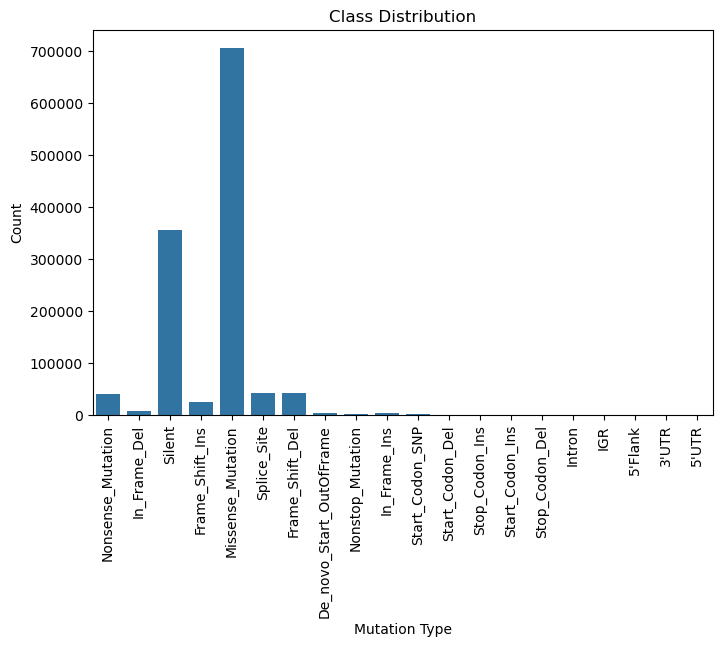

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Variant_Classification'])
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.xlabel("Mutation Type")
plt.ylabel("Count")
plt.show()


In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use


Categorical Columns: Index(['Hugo_Symbol', 'Strand', 'Variant_Classification', 'Variant_Type',
       'Reference_Allele', 'Alternate_Allele', 'Genome_Change',
       'Annotation_Transcript', 'DepMap_ID', 'cDNA_Change', 'Codon_Change',
       'Protein_Change', 'Variant_annotation'],
      dtype='object')


C:\Users\PC\AppData\Local\Temp\ipykernel_16432\2698637345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\PC\AppData\Local\Temp\ipykernel_16432\2698637345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\PC\AppData\Local\Temp\ipykernel_16432\2698637345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

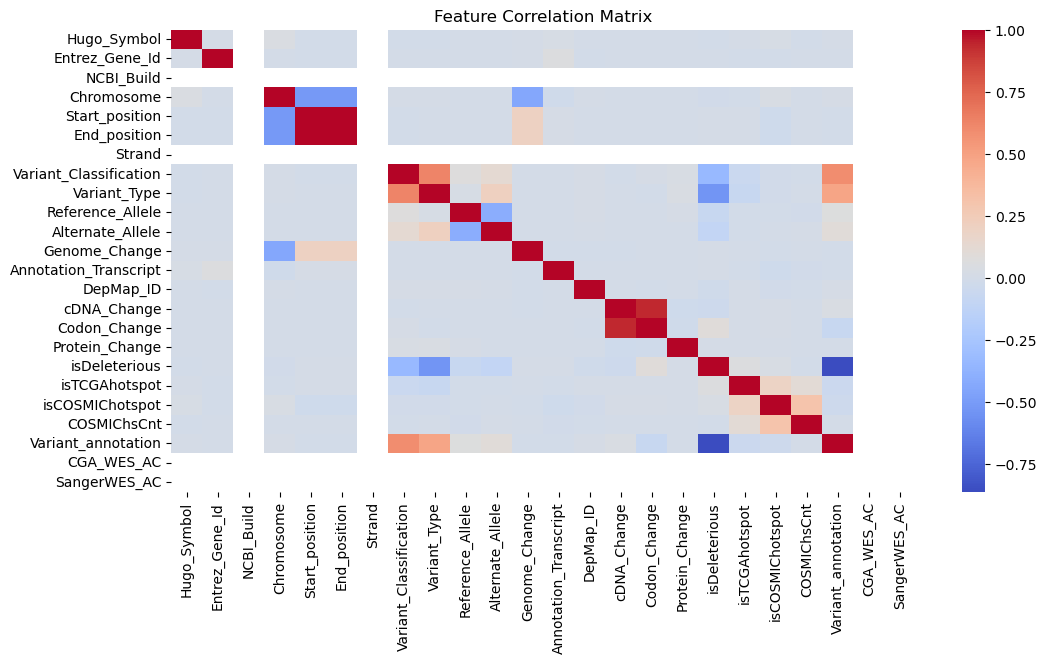

In [9]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


In [10]:
X = df[["Chromosome", "Start_position", "End_position", "Strand", "Variant_Type", 
        "Reference_Allele", "Alternate_Allele", "isDeleterious", "isTCGAhotspot", 
        "isCOSMIChotspot", "COSMIChsCnt", "Variant_annotation"]]
y = df["Variant_Classification"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (984196, 12) (984196,)
Testing Data Shape: (246049, 12) (246049,)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9755495856516385
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.09      0.20      0.12         5
           2       0.33      0.17      0.22         6
           3       0.47      0.43      0.45       862
           4       0.97      0.99      0.98      8408
           5       0.98      0.99      0.99      4950
           6       0.46      0.35      0.40        17
           7       1.00      1.00      1.00      1492
           8       1.00      1.00      1.00       682
           9       0.72      0.75      0.73        68
          10       1.00      1.00      1.00    141380
          11       0.68      0.69      0.68      8017
          12       1.00      1.00      1.00       175
          13       1.00      1.00      1.00     70957
          14       0.69      0.67      0.68      8632
          15       0.93      0.48      0.64        29
          16       1.00      0.80      0.89        1

In [13]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_columns = ["Chromosome", "Strand", "Variant_Type", "Reference_Allele", "Alternate_Allele", "Variant_annotation"]

# Initialize dictionary to store label encoders
label_encoders = {}

# Encode categorical variables and store encoders
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply transformation to dataset
    label_encoders[col] = le  # Store encoder

# Save the label encoders to a file
with open("label_encoders.pkl", "wb") as le_file:
    pickle.dump(label_encoders, le_file)

print("✅ Label Encoders saved successfully!")


C:\Users\PC\AppData\Local\Temp\ipykernel_16432\3542502179.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])  # Apply transformation to dataset
C:\Users\PC\AppData\Local\Temp\ipykernel_16432\3542502179.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])  # Apply transformation to dataset
C:\Users\PC\AppData\Local\Temp\ipykernel_16432\3542502179.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

✅ Label Encoders saved successfully!


In [15]:
import pickle
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Chromosome", "Start_position", "End_position", "Strand", 
                                    "Variant_Type", "Reference_Allele", "Alternate_Allele", 
                                    "isDeleterious", "isTCGAhotspot", "isCOSMIChotspot", 
                                    "COSMIChsCnt", "Variant_annotation"]])

# Save the scaler to a file
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [14]:
import pickle
with open("mutation_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved successfully using pickle!")


Model saved successfully using pickle!
